<a href="https://colab.research.google.com/github/Hamza-t/7-Days-of-Exploratory-Data-Analysis/blob/main/First_Day_olymics_tokyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2021 Olympics in **Tokyo**


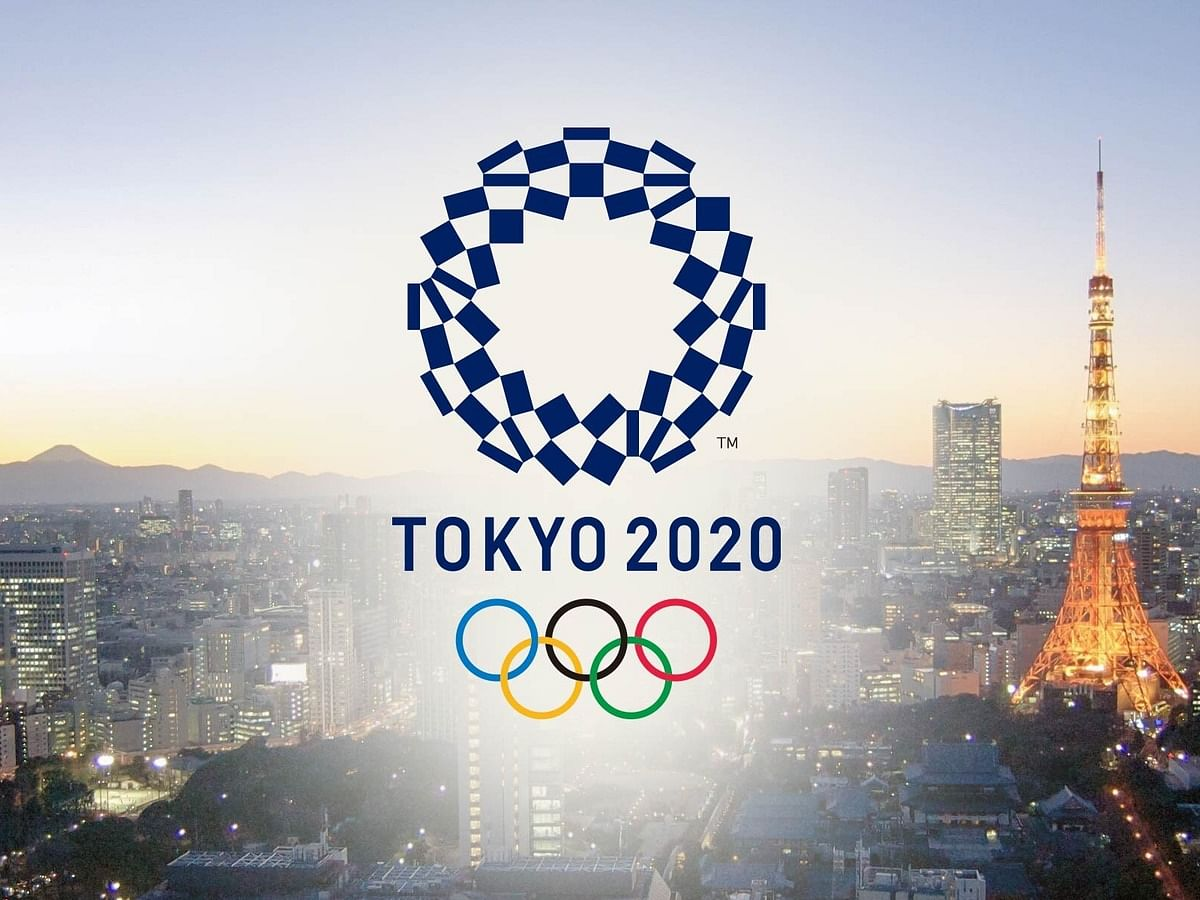

### Details
This contains the details of over 11,000 athletes, with 47 disciplines, along with 743 Teams taking part in the 2021(2020) Tokyo Olympics.
This dataset contains the details of the Athletes, Coaches, Teams participating as well as the Entries by gender. It contains their names, countries represented, discipline, gender of competitors, name of the coaches.

Will update the dataset with medals(gold, silver, bronze), more details about the athletes after few weeks.

###Credits
Source: Tokyo Olympics 2020 Website

###DATA info ::
####Athletes.xlsx : Contains details about the participating Athletes(( Name (name of the athlete) , NOC (Country) , Discipline )

####Coaches.xlsx : Contains details about the Coach(Country, Discipline, Event)
####EntriesGender.xlsx : Contains details about the Coach(Country, Discipline, Event)
####Medals.xlsx : Medals as on 29th July 2021
####Teams.xlsx : Contains the details of all the Teams(Country, event, Discipline, Event)

##Importing Liabraries

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import os
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od

##Data Preparation and Cleaning
###Load the file using Pandas
###Look at some information about the data & the columns
###Fix any missing or incorrect values

In [ ]:
#Connect with Kagle !
path="https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo"
od.download(path)

Skipping, found downloaded files in "./2021-olympics-in-tokyo" (use force=True to force download)


In [ ]:
path_c= "./2021-olympics-in-tokyo"
os.listdir(path_c)

['Teams.xlsx',
 'Coaches.xlsx',
 'Medals.xlsx',
 'Athletes.xlsx',
 'EntriesGender.xlsx']

In [ ]:
#Read the files 
Teams= pd.read_excel(path_c+"/Teams.xlsx")
Coaches=pd.read_excel(path_c+"/Coaches.xlsx")
Athletes=pd.read_excel(path_c+"/Athletes.xlsx")
Gender=pd.read_excel(path_c+"/EntriesGender.xlsx")
Medals=pd.read_excel(path_c+"/Medals.xlsx")

In [ ]:
def print_data(data):
  print("-"*120)
  data.info()
  print("-"*100)
  print("Data :")
  print(data.head())
  print("-"*120)

In [ ]:
 #Print Data 
Data=[Teams,Coaches,Athletes,Gender,Medals]
Data_names = ["Teams","Coaches","Athletes","Gender","Medals"]
k=0
for i in Data:
  print("%s data ::" %Data_names[k])
  k=k+1
  print_data(i)
  print("\n")

Teams data ::
------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        743 non-null    object
 1   Discipline  743 non-null    object
 2   NOC         743 non-null    object
 3   Event       743 non-null    object
dtypes: object(4)
memory usage: 23.3+ KB
----------------------------------------------------------------------------------------------------
Data :
      Name      Discipline                         NOC  Event
0  Belgium  3x3 Basketball                     Belgium    Men
1    China  3x3 Basketball  People's Republic of China    Men
2    China  3x3 Basketball  People's Republic of China  Women
3   France  3x3 Basketball                      France  Women
4    Italy  3x3 Basketball                       Italy  Women


In [ ]:
#Stats for datasets 
Data=[Teams,Coaches,Athletes,Gender,Medals]
Data_names = ["Teams","Coaches","Athletes","Gender","Medals"]
k=0
for i in Data:
  print("stats of %s" %Data_names[k])
  k=k+1
  print(i.describe())
  print("-"*90)

stats of Teams
         Name Discipline    NOC Event
count     743        743    743   743
unique    146         20     84    36
top     Japan   Swimming  Japan   Men
freq       45        113     48   120
------------------------------------------------------------------------------------------
stats of Coaches
                 Name    NOC  Discipline Event
count             394    394         394   249
unique            381     61           9     6
top     SZAUDER Gabor  Japan  Basketball   Men
freq                2     35          74    94
------------------------------------------------------------------------------------------
stats of Athletes
               Name                       NOC Discipline
count         11085                     11085      11085
unique        11062                       206         46
top     ALI Mohamed  United States of America  Athletics
freq              2                       615       2068
----------------------------------------------------------

In [ ]:
#Percentage of missing values per column
k=0
for df in Data:
  print("Percentage of missing values per column of %s " %Data_names[k] )
  k=k+1
  print(df.isna().sum().sort_values(ascending=False) / len(df))
  print("-"*100)

Percentage of missing values per column of Teams 
Event         0.0
NOC           0.0
Discipline    0.0
Name          0.0
dtype: float64
----------------------------------------------------------------------------------------------------
Percentage of missing values per column of Coaches 
Event         0.36802
Discipline    0.00000
NOC           0.00000
Name          0.00000
dtype: float64
----------------------------------------------------------------------------------------------------
Percentage of missing values per column of Athletes 
Discipline    0.0
NOC           0.0
Name          0.0
dtype: float64
----------------------------------------------------------------------------------------------------
Percentage of missing values per column of Gender 
Total         0.0
Male          0.0
Female        0.0
Discipline    0.0
dtype: float64
----------------------------------------------------------------------------------------------------
Percentage of missing values per column of M

There is a missing data in Coaches_data , 
 About 37% data is missing in the column and as this is a categorical variable, we could replace with mode but that would make the dataset rather incorrect, so let's just leave it as it is.




```
# This is formatted as code
```

##Data Analysis

Question 1 : what are the most Discipline in the olympiade ? 

In [ ]:
#data
data = Athletes.Discipline.value_counts()
# number of discipline 
num_disc = data.values
# Categorical data: Country names
num_disc_index = data.index
#print(num_disc)
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize = (12,7))

import plotly.express as px
# Passing the parameters to the bar function, this is the main function which creates the bar plot
fig= px.bar(data , x=num_disc_index, y=num_disc ,title="Bar plot representing the most Discipline in the olympiade ",labels={"x":"Athletes","y":"Number"})
#display the fig 
fig.show()

<Figure size 864x504 with 0 Axes>

In [ ]:
# OR by a pie chart 
fig = px.pie(data, values=num_disc, names=num_disc_index, title='the most Discipline in the olympiade ')
fig.show()

Athletics is the most popular discipline in the olympics; it has most number of participants. Swimming and Football are the next most popular ones but Cycling BMX Freestyle is the least popular discipline with only 19 participants .

Question 2 : Which countries have the most numbers of athletes ?

In [ ]:
data=Athletes.NOC.value_counts()
x,y=data.index[:20],data.values[:20]
plt.figure(figsize = (12,20))
fig= px.bar(data , x=x, y=y ,title="Bar plot representing the top 20 countries with the most numbers of athletes ",labels={"x":"Athletes","y":"Number"})
#display the fig 
fig.show()

<Figure size 864x1440 with 0 Axes>

In [ ]:
#OR 
fig = px.pie( data, values=y, names=x, title='perc')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Question 3 : Which countries have the most numbers of coaches ?

In [ ]:
Coaches.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


<Figure size 1440x576 with 0 Axes>

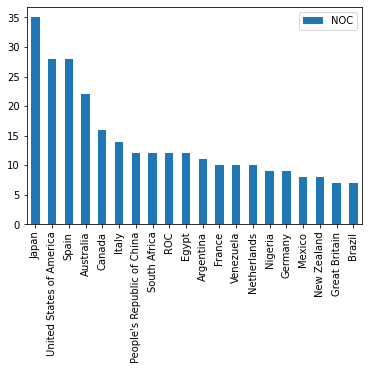

In [ ]:
data=Coaches.NOC.value_counts()[:20].to_frame()
plt.figure(figsize = (20,8))
data.plot.bar()
plt.show()


Question 4 : Disciplines across gender ?

   Discipline  Female  Male
4   Athletics     969  1072
36   Swimming     361   418
20   Football     264   344
29     Rowing     257   265
24       Judo     192   201


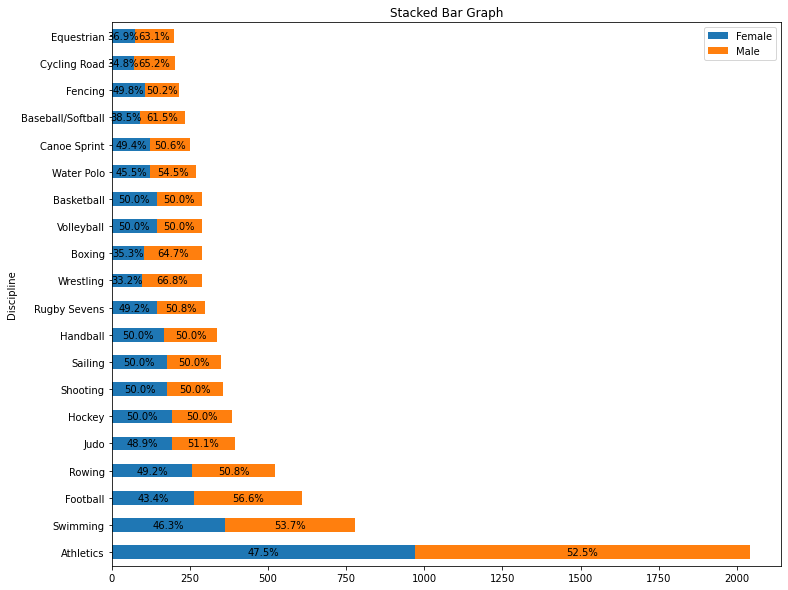

In [ ]:
data=Gender.sort_values(["Total"], ascending=False)
data_l = [data["Discipline"],data["Female"],data["Male"]]

headers = ["Discipline","Female", "Male"]

data_d = pd.concat(data_l, axis=1, keys=headers)
print(data_d.head())
fig, ax = plt.subplots(figsize=(12,10))
data_d[:20].plot(x = 'Discipline', kind = 'barh',   stacked = True, title = 'Stacked Bar Graph', mark_right = True,ax=ax)
c=data_d[:20]
total = c["Female"] + c["Male"]
rel = c[c.columns[1:]].div(total, 0)*100 
for n in rel:
    for i, (s, b, p) in enumerate(zip(c.iloc[:, 1:].cumsum(1)[n], c[n], rel[n])):
        plt.text(s - b / 2, i, str(np.round(p, 1)) + '%', va = 'center', ha = 'center',fontsize = 10)

Question 5 : country across discipines ?

In [ ]:
Athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [ ]:
def country(coun):
  data=Athletes[Athletes['NOC']==coun]
  data_c = data.Discipline.value_counts()
  x,y=data_c.index[:15] , data_c.values[:15]
  fig = px.pie( data_c, values=y, names=x, title='percentage of discipline coming from %s ' %coun )
  fig.update_traces(textposition='inside', textinfo='percent+label')
  fig.show()

In [ ]:
country("Tunisia")

In [ ]:
country("Spain")

Question 6 : Which country recieved the highest number of medals ?

In [ ]:
Medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [ ]:
data = Medals.sort_values(["Total"], ascending=False)
data.head()
x,y=data["Team/NOC"][:20],data["Total"][:20]
plt.figure(figsize = (12,20))
fig= px.bar(data , x=x, y=y ,title="Bar plot representing the top 20 countries with the most numbers of Medals ",labels={"x":"Country","y":"Number of Medals"})
#display the fig 
fig.show()

<Figure size 864x1440 with 0 Axes>

USA has most  medals among all countries 113, with China having 88 and ROC behind them with 71 medals .

Question 8 : Which country recieved most gold medals? Which recieved most silver and most bronze? Which received least for each?

In [ ]:
Medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [ ]:
data = Medals.sort_values(["Gold"], ascending=False)
data.head()
x,y=data["Team/NOC"][:20],data["Gold"][:20]
plt.figure(figsize = (12,20))
fig= px.bar(data , x=x, y=y ,title="Bar plot representing the top 20 countries with the most numbers of  gold Medals ",labels={"x":"Country","y":"Number of Medals"})
#display the fig 
fig.show()

<Figure size 864x1440 with 0 Axes>

USA has most gold medals among all countries (39), with China having one less (38) and Japan behind them (27).

In [ ]:
data = Medals.sort_values(["Silver"], ascending=False)
data.head()
x,y=data["Team/NOC"][:20],data["Gold"][:20]
plt.figure(figsize = (12,20))
fig= px.bar(data , x=x, y=y ,title="Bar plot representing the top 20 countries with the most numbers of  Silver Medals ",labels={"x":"Country","y":"Number of Medals"})
#display the fig 
fig.show()

<Figure size 864x1440 with 0 Axes>

USA also has the most silver medals (41) and China second highest (32).

In [ ]:
data = Medals.sort_values(["Bronze"], ascending=False)
data.head()
x,y=data["Team/NOC"][:20],data["Gold"][:20]
plt.figure(figsize = (12,20))
fig= px.bar(data , x=x, y=y ,title="Bar plot representing the top 20 countries with the most numbers of  Bronze Medals ",labels={"x":"Country","y":"Number of Medals"})
#display the fig 
fig.show()

<Figure size 864x1440 with 0 Axes>

Again, USA with the most number of bronze medals with Russia the second highest (23).

##Final Analysis


==> Most althletes in the olympics reside from countries like the United States of America, Japan and Australia. This could be because these countries promote sports and athletics from a younger age, hone the youth and prepare them to compete in such higher levels and invest more behind these. Unlike countries like Tanzania or Sudan, these countries probably have a better sports culture.

==> Athletics is the most popular discipline in the Olympics. This could be because other sports like football/basketball get other stages for players to display their merits so probably this is why athetes performing in athletics try to display their abilities in this grand stage.

==> Japan produces the most coaches and US after them. Again this could be because of the vast culture of sports in these nations and as athletes grow preparing from a much younger age, they gain a lot of experience, resultingly becoming coaches.

==> Females participate in all the disciplines but comparatively less than men. This cannot be because of any kinds of discrimination, rather the lack of growth of mindsets in young women to become great athletes someday in comparison to men. But, surely this statistic has developed a lot in the past years and some day, women might dominate more in these stages too.

==> USA has highest number of gold, silver and bronze medals and this shows how succesful the US is. The biggest reason could be wealth; more investment on athletes and their respective disciplines. Having better coaches and facilities does help create better and improved athletes so wealth could probably be why USA does so much better than other countries.